<a href="https://colab.research.google.com/github/PuteriRaifeeza/Projects/blob/main/Unsupervised_Clustering_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Monday 29 July 2024**

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

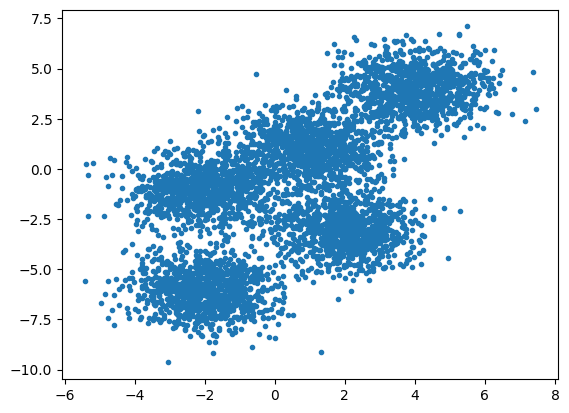

In [ ]:
#creating data set
X, y = make_blobs(n_samples = 5000, centers=[[4,4],[-2,-1],[2,-3],[1,1],[-2,-6]], cluster_std=1)
plt.scatter(X[:, 0], X[:, 1], marker= '.')

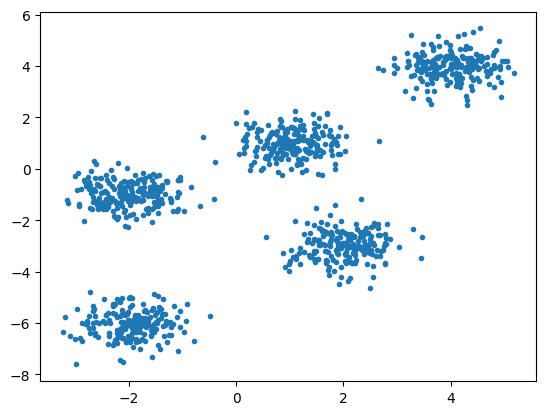

In [ ]:
#creating data set
X, y = make_blobs(n_samples = 1000, centers=[[4,4],[-2,-1],[2,-3],[1,1],[-2,-6]], cluster_std=0.5)
plt.scatter(X[:, 0], X[:, 1], marker= '.')

In [ ]:
#modeling
k_means = KMeans(n_clusters=5,n_init=5) #default value is 8
k_means.fit(X)
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 4.01246543,  3.97516038],
       [ 1.99717294, -2.99334178],
       [-2.01813793, -0.98390554],
       [-1.95250372, -6.04004902],
       [ 1.02616164,  0.99466612]])

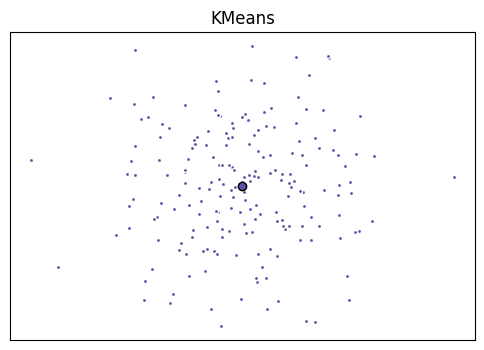

In [ ]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1], [-2, -6]])), colors):

# Create a list of all data points, where the data poitns that are
# in the cluster (ex. cluster 0) are labeled as true, else they are
# labeled as false.
 my_members = (k_means_labels == k)

# Define the centroid, or cluster center.
cluster_center = k_means_cluster_centers[k]

# Plots the datapoints with color col.
ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')

# Plots the centroids with specified color, but with a darker outline
ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

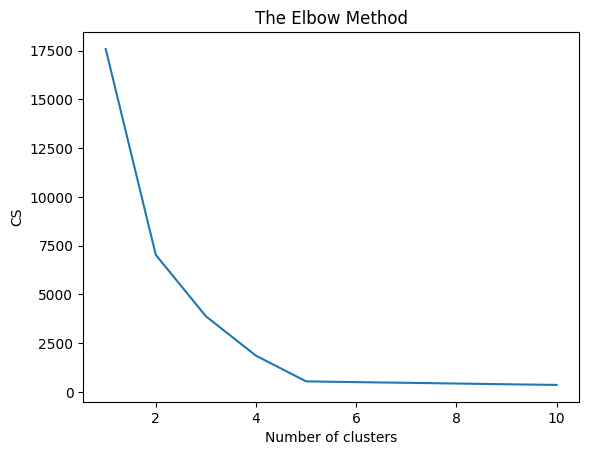

In [ ]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()